In [9]:
import pandas as pd

path = "./archive/medium_articles.csv"

df = pd.read_csv(path, delimiter=",", quotechar='"')

print(df.head())  # Afficher les premières lignes


                              title  \
0               Mental Note Vol. 24   
1         Your Brain On Coronavirus   
2                    Mind Your Nose   
3          The 4 Purposes of Dreams   
4  Surviving a Rod Through the Head   

                                                text  \
0  Photo by Josh Riemer on Unsplash\n\nMerry Chri...   
1  Your Brain On Coronavirus\n\nA guide to the cu...   
2  Mind Your Nose\n\nHow smell training can chang...   
3  Passionate about the synergy between science a...   
4  You’ve heard of him, haven’t you? Phineas Gage...   

                                                 url                 authors  \
0  https://medium.com/invisible-illness/mental-no...            ['Ryan Fan']   
1  https://medium.com/age-of-awareness/how-the-pa...       ['Simon Spichak']   
2  https://medium.com/neodotlife/mind-your-nose-f...                      []   
3  https://medium.com/science-for-real/the-4-purp...  ['Eshan Samaranayake']   
4  https://medium.com/live-y

In [10]:
import re

def remove_non_ascii(text):
    if isinstance(text, str):
        return re.sub(r'[^\x00-\x7F]+', '', text)  # Supprime tout caractère non ASCII
    return text

df = df.applymap(remove_non_ascii)  # Appliquer sur toutes les cellules du DataFrame



C:\Users\scien\AppData\Local\Temp\ipykernel_7552\2683255740.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(remove_non_ascii)  # Appliquer sur toutes les cellules du DataFrame


C:\Users\scien\AppData\Local\Temp\ipykernel_7552\4072090413.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tag_df['Tag'], y=tag_df['Nombre d’articles'], palette="viridis")
C:\Users\scien\AppData\Local\Temp\ipykernel_7552\4072090413.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tag_df['Tag'], y=tag_df['Nombre d’articles'], palette="viridis")


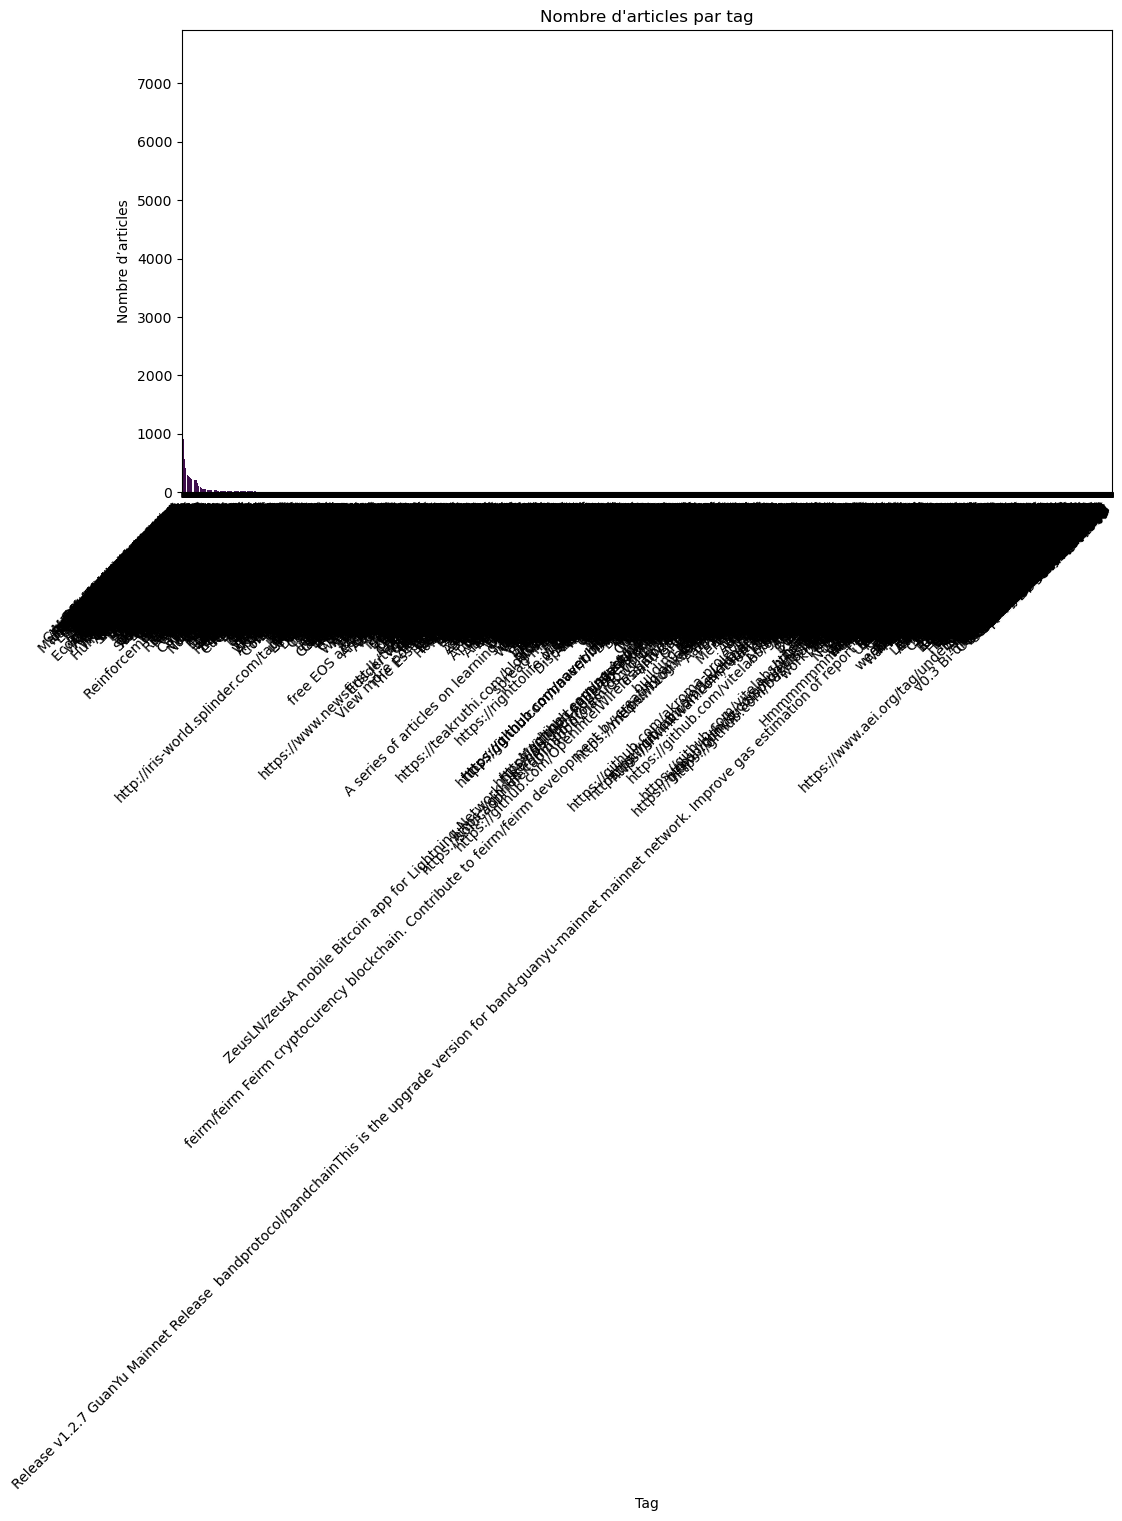

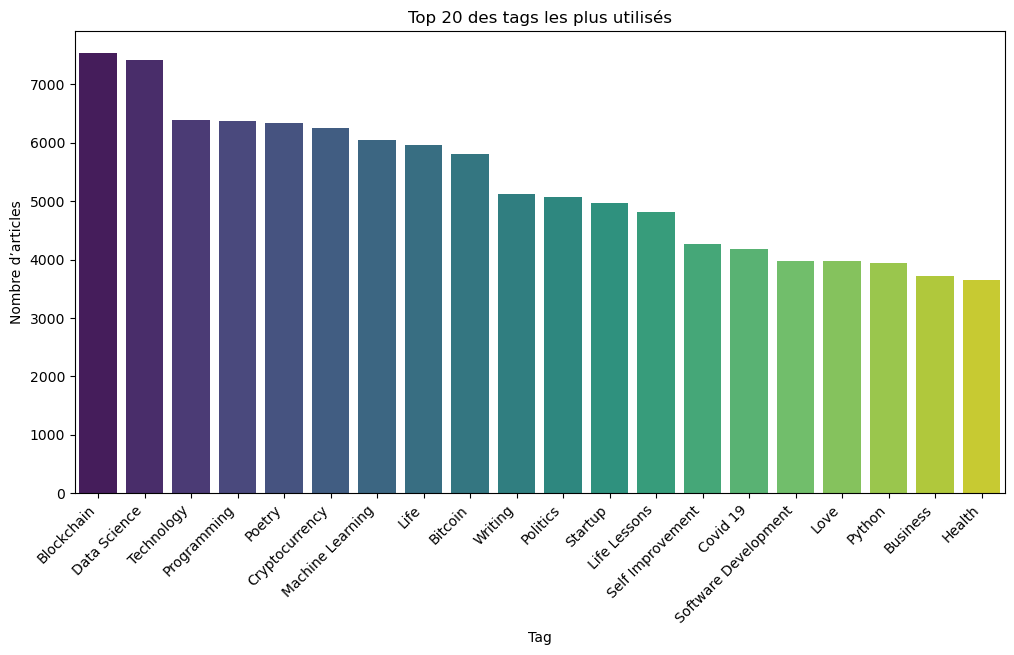

In [ ]:
import ast

# Convertir la colonne 'tags' en listes Python
df['tags'] = df['tags'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])


from collections import Counter

# Rassembler tous les tags dans une seule liste
all_tags = [tag for sublist in df['tags'] for tag in sublist]

# Compter la fréquence de chaque tag
tag_counts = Counter(all_tags)

# Convertir en DataFrame pour l'affichage graphique
tag_df = pd.DataFrame(tag_counts.items(), columns=['Tag', 'Nombre d’articles'])
tag_df = tag_df.sort_values(by='Nombre d’articles', ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'DejaVu Sans'

N = 20  # Nombre de tags à garder
tag_df = tag_df.nlargest(N, 'Nombre d’articles')  # Prendre les N plus grands

# Refaire le graphique avec les tags limités
plt.figure(figsize=(12,6))
sns.barplot(x=tag_df['Tag'], y=tag_df['Nombre d’articles'], palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Top 20 des tags les plus utilisés")
plt.show()


C:\Users\scien\AppData\Local\Temp\ipykernel_7552\3455736790.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['date'] = df_2020['timestamp'].dt.date  # Extraire la date sans l'heure


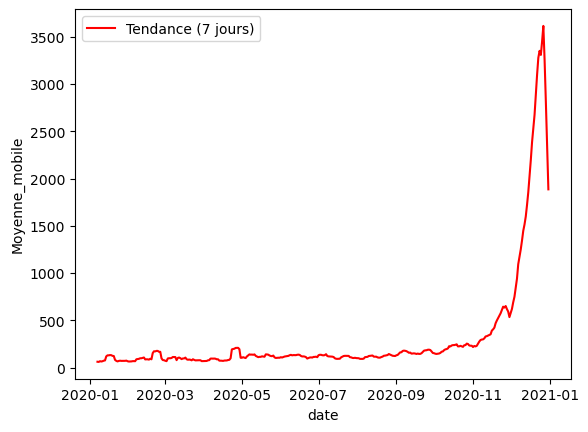

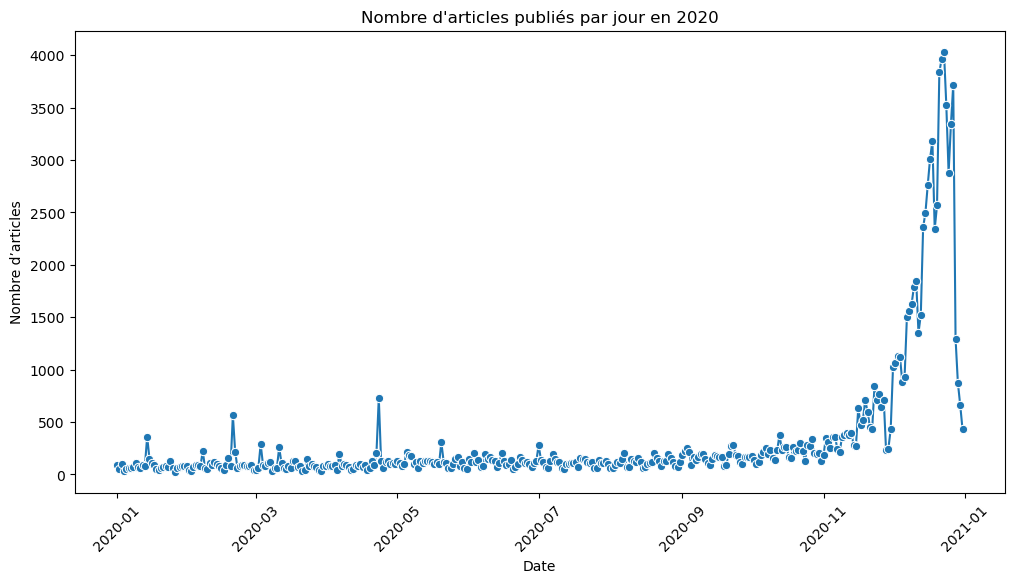

In [15]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='mixed', utc=True)  # Conversion correcte

# Filtrer uniquement l'année 2020
df_2020 = df[df['timestamp'].dt.year == 2020]

df_2020['date'] = df_2020['timestamp'].dt.date  # Extraire la date sans l'heure

# Grouper par jour
articles_per_day = df_2020.groupby('date').size().reset_index(name='Nombre d’articles')

articles_per_day['Moyenne_mobile'] = articles_per_day['Nombre d’articles'].rolling(window=7).mean()

sns.lineplot(x=articles_per_day['date'], y=articles_per_day['Moyenne_mobile'], color='red', label="Tendance (7 jours)")

plt.figure(figsize=(12,6))

# Graphique en ligne des publications par jour
sns.lineplot(x=articles_per_day['date'], y=articles_per_day['Nombre d’articles'], marker="o")

# Rotation des dates pour meilleure lisibilité
plt.xticks(rotation=45)
plt.title("Nombre d'articles publiés par jour en 2020")
plt.xlabel("Date")
plt.ylabel("Nombre d’articles")
plt.show()
